# **Color-Identification in Images*

I will use OpenCV2 for image manipulation, apply KMeans to identify the major colors and then plot the information using Matplotlib.



# **Import Libraries**


Let's first import necessary libraries. We need sklearn for KMeans algorithm, matplotlib.pyplot for plotting graphs, numpy to work with arrays, cv2 to work with image data, collections to use Counter to count values, rgb2lab to convert RGB values and deltaE_cie76 to calculate similarity between colors.



In [26]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os

%matplotlib inline

## **Working with OpenCV**
Let's first read a sample image and understand basic operations that we can do on it.

The type of this input is <class 'numpy.ndarray'>
Shape: (933, 1400, 3)


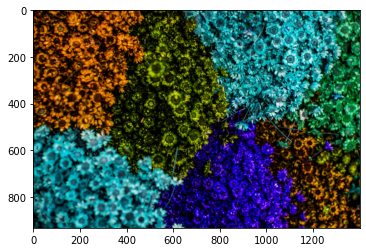

In [27]:
imgName = '0_9H74uSINU-qGHWz5.jpg'
image = cv2.imread(imgName)
print("The type of this input is {}".format(type(image)))
print("Shape: {}".format(image.shape))
plt.imshow(image)


We see that the image has different colors as compared to the original image. This is because by default OpenCV reads the images in the color order BLUE GREEN RED i.e. BGR. Thus, we need to convert it into REG GREEN BLUE i.e. RGB.

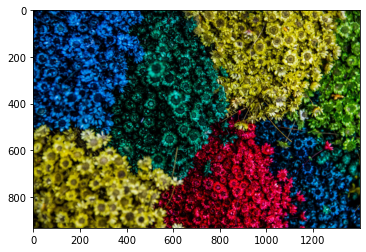

In [28]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

We might want to resize the image to a certain size whenever the images are huge or when we are working with multiple images of different dimensions.



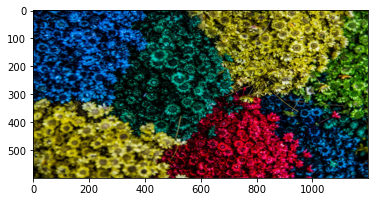

In [29]:
resized_image = cv2.resize(image, (1200, 600))
plt.imshow(resized_image)

## **Color Identification**

First, we will define a function that can give us the hex values of our the colors that we will identify.

In [30]:
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

KMeans expects flattened array as input during its fit method. Thus, we need to reshape the image using numpy. Then, we can apply KMeans to first fit and then predict on the image to get the results. Then, the cluster colors are identified an arranged in the correct order. We plot the colors as a pie chart.

In [31]:
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [32]:
def get_colors(image, number_of_colors, show_chart):
    
    modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
    
    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(modified_image)
    
    counts = Counter(labels)
    # sort to ensure correct color percentage
    counts = dict(sorted(counts.items()))
    
    center_colors = clf.cluster_centers_
    # We get ordered colors by iterating through the keys
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]

    if (show_chart):
        plt.figure(figsize = (8, 6))
        plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)
    
    return rgb_colors

[array([83.17041184, 89.75721711, 14.7089964 ]),
 array([ 5.0732011 , 62.84820184, 82.256782  ]),
 array([197.09789794, 197.92832207, 106.61784149]),
 array([ 9.89944749, 16.8722694 , 16.41595897]),
 array([157.11183543, 155.08738969,  25.3422404 ]),
 array([  6.83239981, 117.42052149, 176.07069049]),
 array([101.56585857,   3.52204877,  16.15473707]),
 array([201.0476286 ,   9.67582473,  57.34162238])]

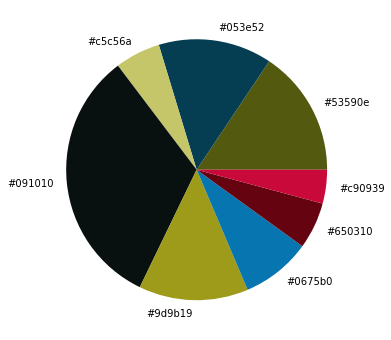

In [33]:
get_colors(get_image(imgName), 8, True)